In [9]:
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

df = pd.read_csv("AAPL.csv")
df.head()

,Date,Open,High,Low,Close
0,17-10-17,159.779999,160.869995,159.229996,160.470001
1,18-10-17,160.419998,160.710007,159.600006,159.759995
2,19-10-17,156.750000,157.080002,155.020004,155.979996
3,20-10-17,156.610001,157.750000,155.960007,156.250000
4,23-10-17,156.889999,157.690002,155.500000,156.169998


In [3]:
x = np.array(df['Close'])

In [31]:
data = pd.read_csv("AAPL.csv")
data.Date = pd.to_datetime(data.Date, format='%d-%m-%y') # need same format as Date
data = data.set_index(data.Date)
data = data.drop_duplicates(keep=False) # get rid of mkt closed times

In [40]:
price = data.Close

In [41]:
max_index = list(argrelextrema(price.values, np.greater, order=10)[0]) 
min_index = list(argrelextrema(price.values, np.less, order=10)[0])

In [42]:
idx = max_index + min_index
idx.sort()

In [43]:
peaks = price.values[idx]

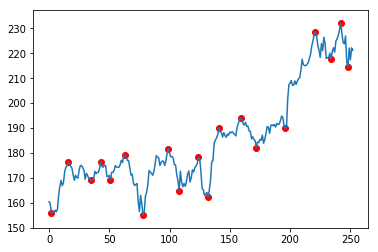

In [44]:
plt.plot(price.values)
plt.scatter(idx,peaks,c='r')
plt.show()

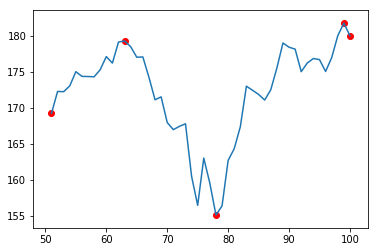

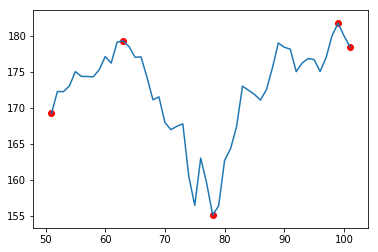

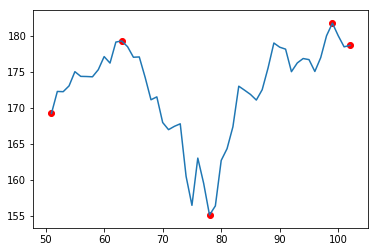

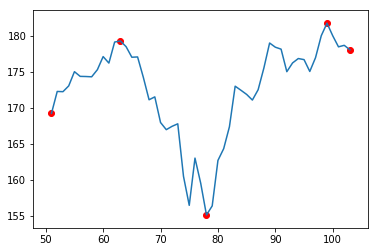

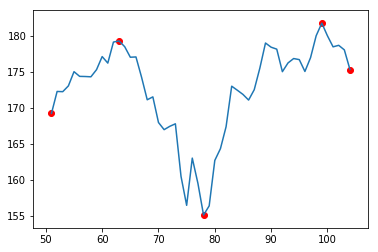

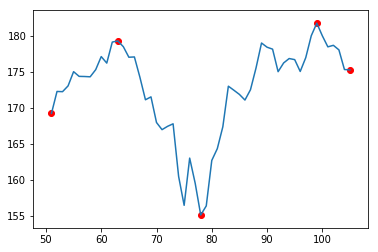

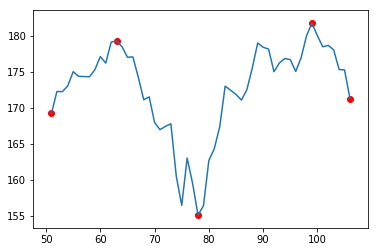

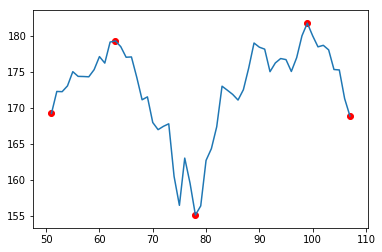

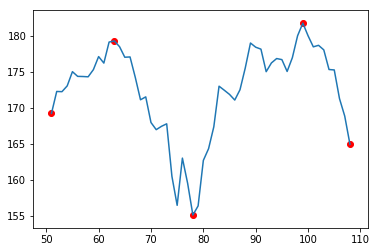

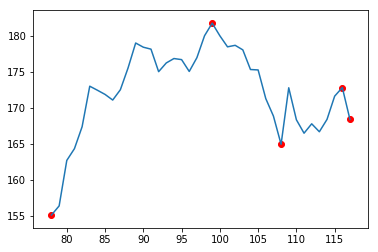

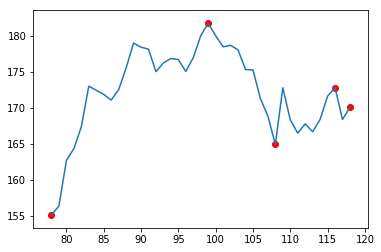

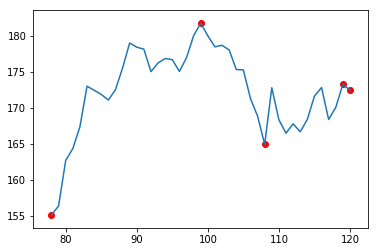

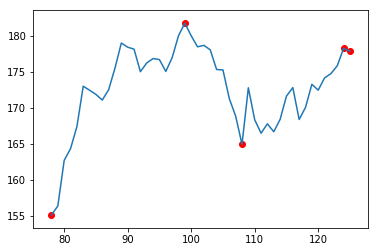

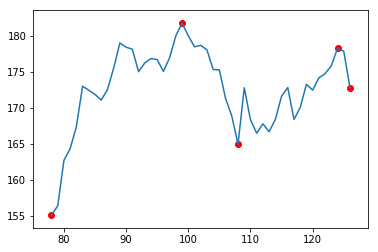

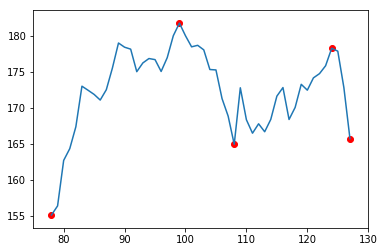

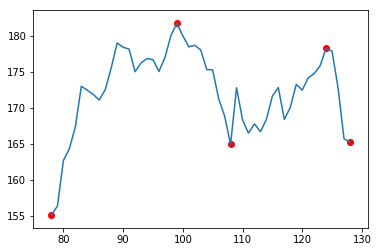

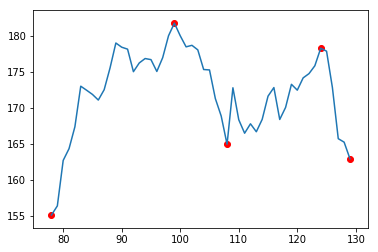

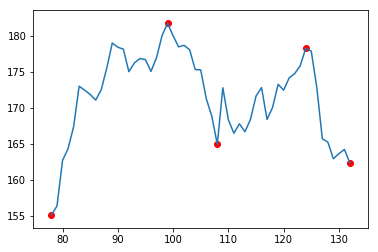

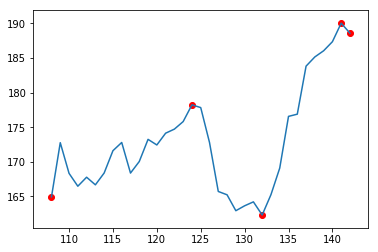

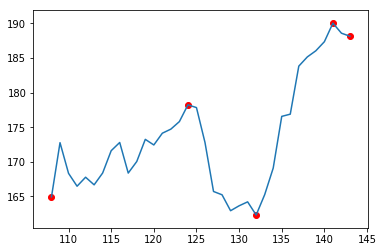

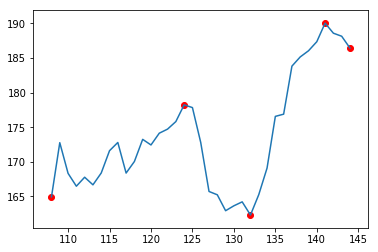

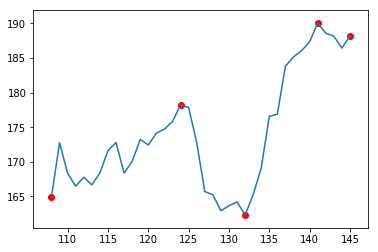

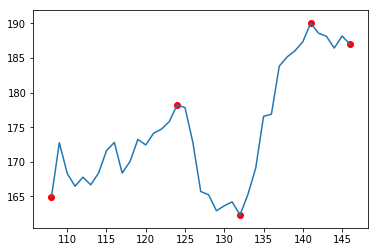

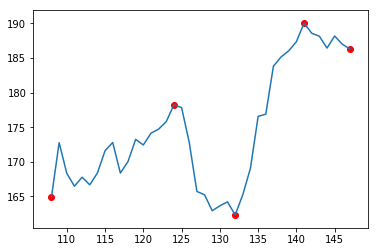

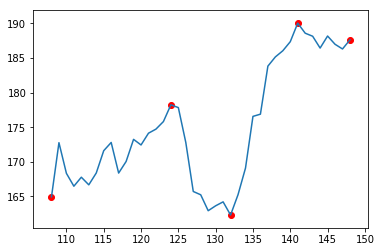

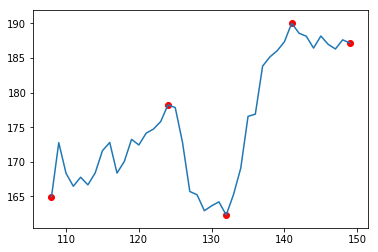

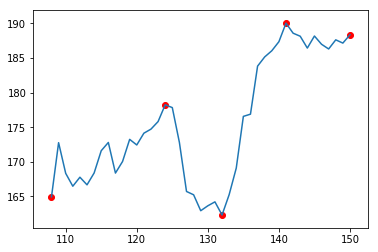

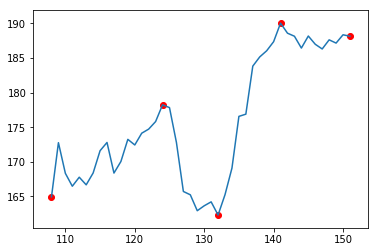

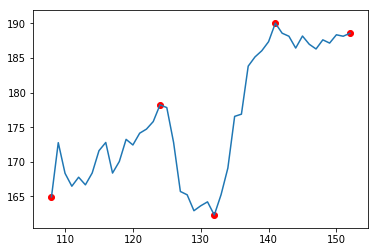

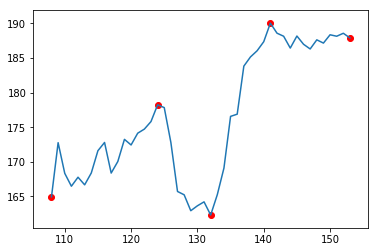

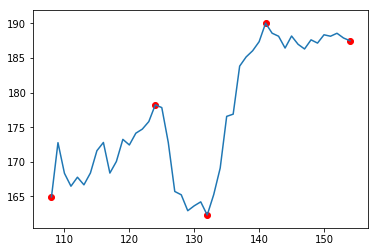

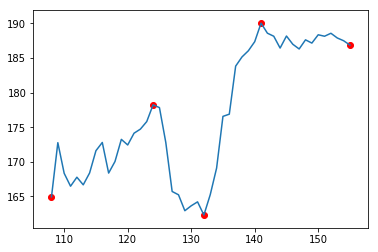

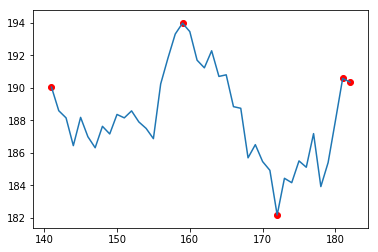

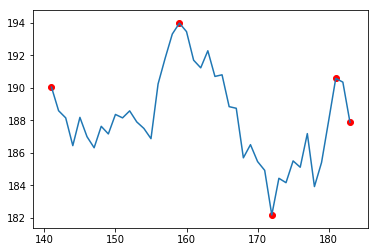

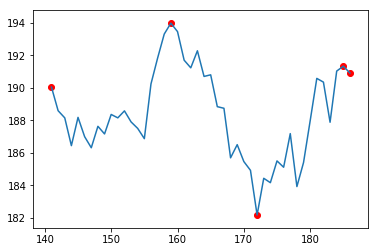

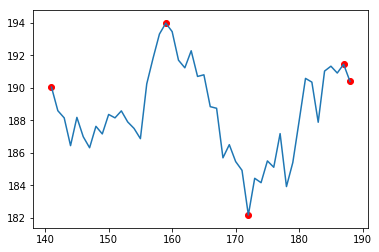

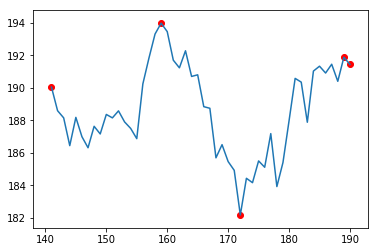

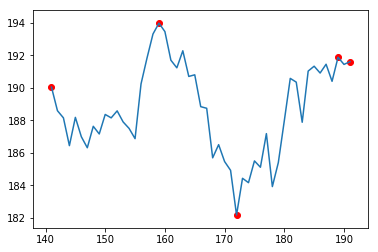

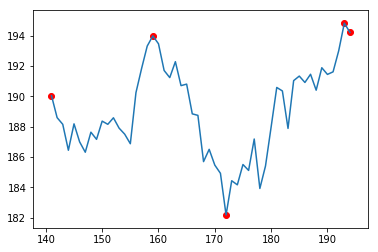

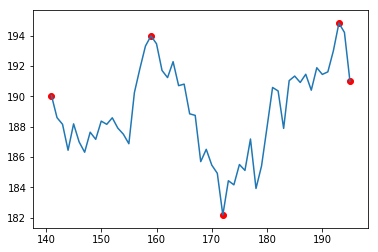

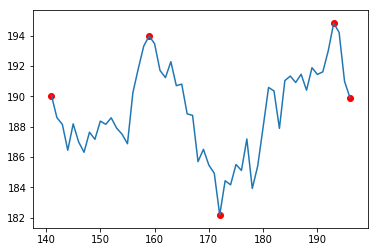

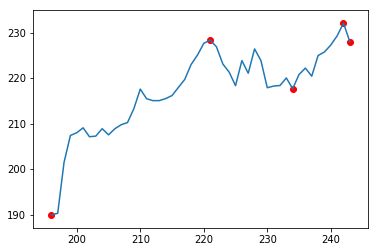

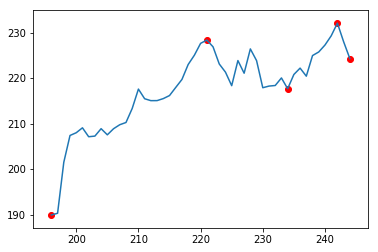

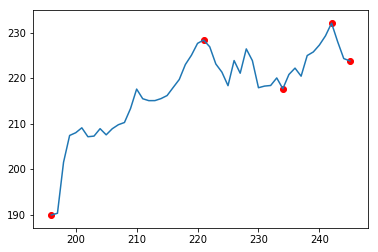

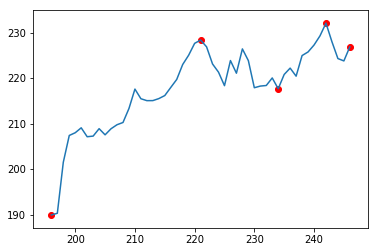

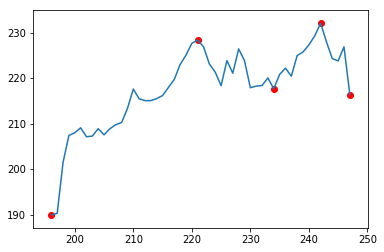

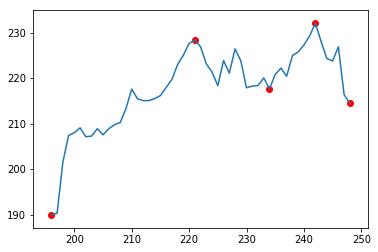

In [50]:
for i in range(100, len(price)):
    
    max_index = list(argrelextrema(price.values[:i], np.greater, order=10)[0]) 
    min_index = list(argrelextrema(price.values[:i], np.less, order=10)[0])
    
    idx = max_index + min_index + [len(price.values[:i])-1]
    
    idx.sort()
    
    # get the pattern 5 steps
    current_idx = idx[-5:]
    current_pat = price.values[current_idx]
    
    # starter & ender
    start = min(current_idx)
    end = max(current_idx)
    
    # up down up down - XA ...
    XA = current_pat[1] - current_pat[0]
    AB = current_pat[2] - current_pat[1]
    BC = current_pat[3] - current_pat[2]
    CD = current_pat[4] - current_pat[3]
    # check harmonicity
    if XA > 0 and AB < 0 and BC > 0 and CD < 0:
        plt.plot(np.arange(start, i), price.values[start:i])
        plt.scatter(current_idx, current_pat,c='r')
        plt.show()